In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import datetime
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA


In [2]:
df=pd.read_excel("D:\Aysha\gold data.xlsx",header=10,names=['Date','Rate'])


In [3]:
df

,Date,Rate
0,10/31/1979,3204.0
1,11/30/1979,3183.5
2,12/31/1979,3731.8
3,1/31/1980,5358.0
4,2/29/1980,5286.7
...,...,...
462,4/30/2018,87713.1
463,5/31/2018,88017.0
464,6/29/2018,86888.1
465,7/31/2018,85122.9


In [4]:
df.shape

(467, 2)

In [5]:
df.describe()

,Rate
count,467.000000
mean,27487.528051
std,28901.386276
min,2970.000000
25%,6175.450000
50%,12537.300000
75%,40008.500000
max,95072.200000


In [6]:
df.head

<bound method NDFrame.head of            Date     Rate
0    10/31/1979   3204.0
1    11/30/1979   3183.5
2    12/31/1979   3731.8
3     1/31/1980   5358.0
4     2/29/1980   5286.7
..          ...      ...
462   4/30/2018  87713.1
463   5/31/2018  88017.0
464   6/29/2018  86888.1
465   7/31/2018  85122.9
466   8/31/2018  83631.9

[467 rows x 2 columns]>

In [7]:
df.iloc[10]

Date    8/29/1980
Rate         4867
Name: 10, dtype: object

In [8]:
df.isnull().sum()

Date    0
Rate    0
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [10]:
df["month"] = df.Date.dt.strftime("%b")
df["year"] = df.Date.dt.strftime("%Y")

In [11]:
df

,Date,Rate,month,year
0,1979-10-31,3204.0,Oct,1979
1,1979-11-30,3183.5,Nov,1979
2,1979-12-31,3731.8,Dec,1979
3,1980-01-31,5358.0,Jan,1980
4,1980-02-29,5286.7,Feb,1980
...,...,...,...,...
462,2018-04-30,87713.1,Apr,2018
463,2018-05-31,88017.0,May,2018
464,2018-06-29,86888.1,Jun,2018
465,2018-07-31,85122.9,Jul,2018


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026ECDDE2190>]],
      dtype=object)

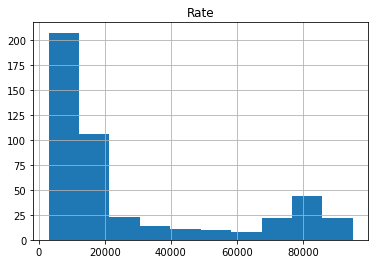

In [12]:
df.hist()

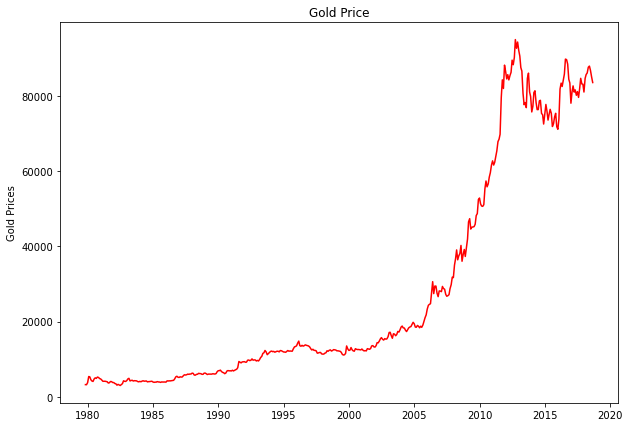

In [13]:
plt.figure(figsize=(10, 7))
plt.plot(df.Date,df.Rate,color='r')
plt.ylabel("Gold Prices")
plt.title("Gold Price")
plt.show()

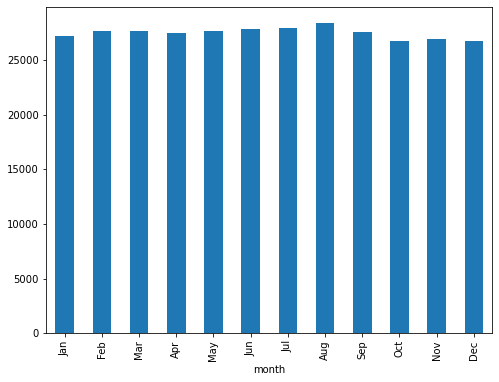

In [14]:
plt.figure(figsize=(8,6))
df.groupby('month')['Rate'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')

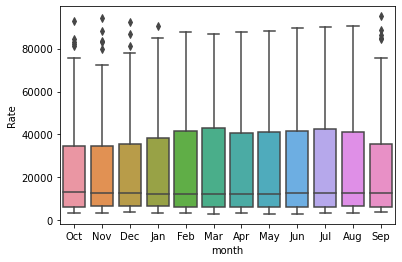

In [15]:
#Box plots
sns.boxplot(x="month",y="Rate",data=df)

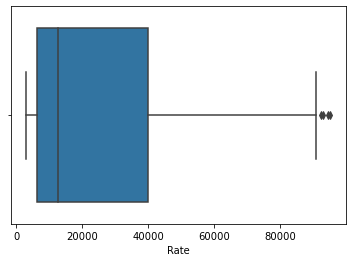

In [16]:
#Box plots
sns.boxplot(x='Rate',data=df)
plt.xlabel("Rate")
#plt.ylabel("FFT amplitude")
plt.savefig('plot.png')

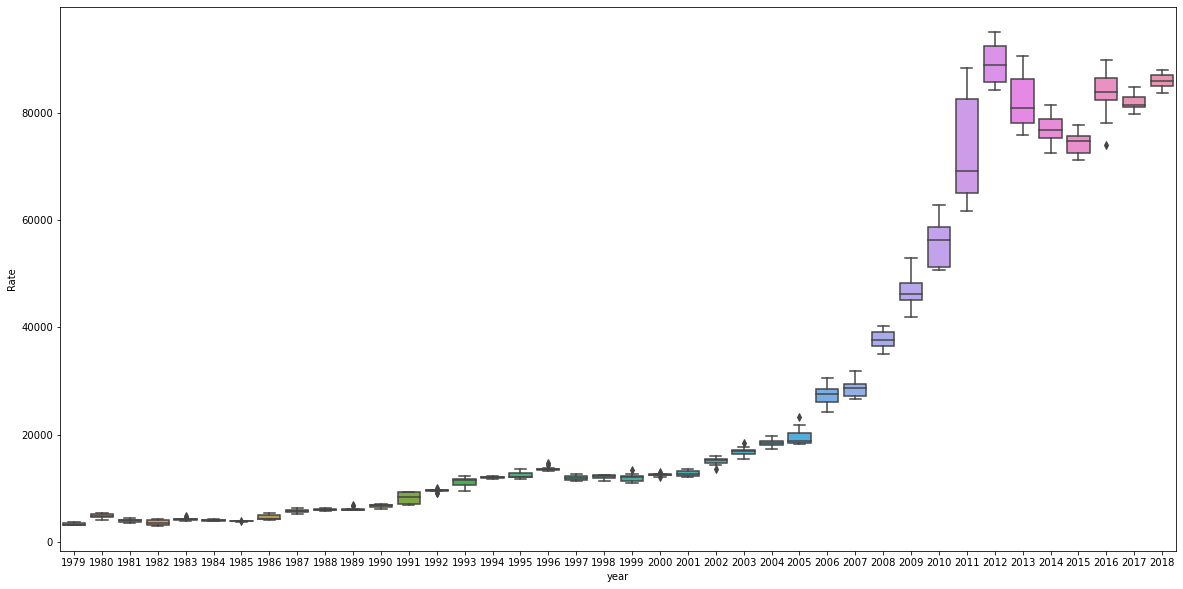

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(x="year",y="Rate",data=df)

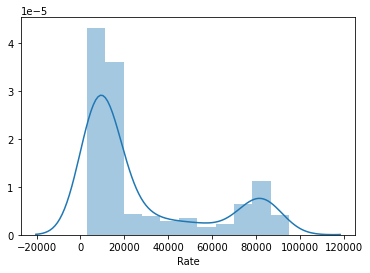

In [18]:
sns.distplot(df.Rate)

In [19]:
# Define explanatory variables
df['S_3'] = df['Rate'].rolling(window=3).mean()
df['S_9'] = df['Rate'].rolling(window=9).mean()
df['next_day_Rate'] = df['Rate'].shift(-1)

df= df.dropna()
X = df[['S_3', 'S_9']]

# Define dependent variable
y = df['next_day_Rate']

In [20]:
# Split the data into train and test dataset
t = .8
t = int(t*len(df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [21]:
df.isnull().sum()

Date             0
Rate             0
month            0
year             0
S_3              0
S_9              0
next_day_Rate    0
dtype: int64

In [22]:
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Rate (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Rate (y) = 1.00 * 3 Days Moving Average (x1) + 0.04 * 9 Days Moving Average (x2) + -231.57 (constant)


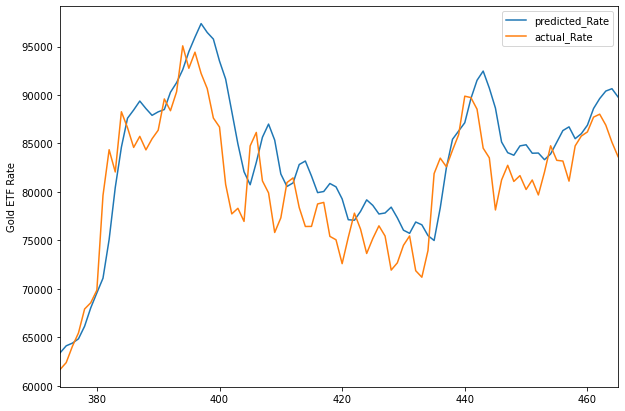

In [23]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['Rate'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_Rate', 'actual_Rate'])
plt.ylabel("Gold ETF Rate")
plt.show()

In [24]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

58.12

In [25]:
from sklearn import  metrics
metrics.r2_score(y_test,predicted_price)

0.5812106470404448

In [26]:
linear_model=pd.concat([y_test,predicted_price],axis=1)

In [27]:
linear_model

,next_day_Rate,Rate
374,61660.9,63377.944076
375,62371.6,64106.013826
376,64040.4,64379.560292
377,65436.9,64827.077296
378,67905.2,66127.874742
...,...,...
461,87713.1,88600.927444
462,88017.0,89626.719970
463,86888.1,90406.107505
464,85122.9,90648.502895


In [28]:
print (metrics.mean_absolute_error(y_test,predicted_price))

3563.0322861825566


In [29]:
print (metrics.mean_squared_error(y_test,predicted_price))

20125746.431581356


In [30]:
print (np.sqrt(metrics.mean_absolute_error(y_test,predicted_price)))

59.69114076797793


In [31]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

<ipython-input-31-fd2f63d7e043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce')


In [32]:
df["month"] = df.Date.dt.strftime("%b")
df["year"] = df.Date.dt.strftime("%Y")

<ipython-input-32-187fdba76450>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df.Date.dt.strftime("%b")
<ipython-input-32-187fdba76450>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df.Date.dt.strftime("%Y")


In [33]:
df

,Date,Rate,month,year,S_3,S_9,next_day_Rate
8,1980-06-30,4711.1,Jun,1980,4309.600000,4244.922222,5012.4
9,1980-07-31,5012.4,Jul,1980,4592.266667,4445.855556,4867.0
10,1980-08-29,4867.0,Aug,1980,4863.500000,4632.911111,5211.1
11,1980-09-30,5211.1,Sep,1980,5030.166667,4797.277778,5112.3
12,1980-10-31,5112.3,Oct,1980,5063.466667,4769.977778,4833.7
...,...,...,...,...,...,...,...
461,2018-03-30,86188.7,Mar,2018,85562.500000,83412.000000,87713.1
462,2018-04-30,87713.1,Apr,2018,86553.100000,84304.600000,88017.0
463,2018-05-31,88017.0,May,2018,87306.266667,84968.544444,86888.1
464,2018-06-29,86888.1,Jun,2018,87539.400000,85205.477778,85122.9


In [34]:
df['1_Day_Moving_Average'] = df['Rate'].shift(1).rolling(window=1).mean()
df['2_Days_Moving_Average'] = df['Rate'].shift(1).rolling(window=2).mean()



<ipython-input-34-5fb02392c393>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['1_Day_Moving_Average'] = df['Rate'].shift(1).rolling(window=1).mean()
<ipython-input-34-5fb02392c393>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2_Days_Moving_Average'] = df['Rate'].shift(1).rolling(window=2).mean()


In [35]:
df

,Date,Rate,month,year,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average
8,1980-06-30,4711.1,Jun,1980,4309.600000,4244.922222,5012.4,NaN,NaN
9,1980-07-31,5012.4,Jul,1980,4592.266667,4445.855556,4867.0,4711.1,NaN
10,1980-08-29,4867.0,Aug,1980,4863.500000,4632.911111,5211.1,5012.4,4861.75
11,1980-09-30,5211.1,Sep,1980,5030.166667,4797.277778,5112.3,4867.0,4939.70
12,1980-10-31,5112.3,Oct,1980,5063.466667,4769.977778,4833.7,5211.1,5039.05
...,...,...,...,...,...,...,...,...,...
461,2018-03-30,86188.7,Mar,2018,85562.500000,83412.000000,87713.1,85757.5,85249.40
462,2018-04-30,87713.1,Apr,2018,86553.100000,84304.600000,88017.0,86188.7,85973.10
463,2018-05-31,88017.0,May,2018,87306.266667,84968.544444,86888.1,87713.1,86950.90
464,2018-06-29,86888.1,Jun,2018,87539.400000,85205.477778,85122.9,88017.0,87865.05


In [36]:
#df = df.set_index(['Date'])
df_stationary=df.copy()
df_stationary=df_stationary.drop(['month','year'],axis=1)
df_stationary = df_stationary.set_index(['Date'])

In [37]:
df_stationary

,Rate,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average
Date,,,,,,
1980-06-30,4711.1,4309.600000,4244.922222,5012.4,NaN,NaN
1980-07-31,5012.4,4592.266667,4445.855556,4867.0,4711.1,NaN
1980-08-29,4867.0,4863.500000,4632.911111,5211.1,5012.4,4861.75
1980-09-30,5211.1,5030.166667,4797.277778,5112.3,4867.0,4939.70
1980-10-31,5112.3,5063.466667,4769.977778,4833.7,5211.1,5039.05
...,...,...,...,...,...,...
2018-03-30,86188.7,85562.500000,83412.000000,87713.1,85757.5,85249.40
2018-04-30,87713.1,86553.100000,84304.600000,88017.0,86188.7,85973.10
2018-05-31,88017.0,87306.266667,84968.544444,86888.1,87713.1,86950.90


In [38]:
#to check stationary
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=365).mean()
    movingSTD = timeseries.rolling(window=365).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Rate'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

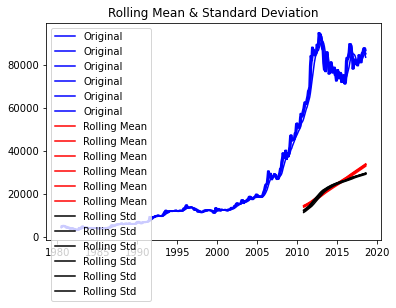

Results of Dickey Fuller Test:
Test Statistic                   0.401006
p-value                          0.981533
#Lags Used                      17.000000
Number of Observations Used    440.000000
Critical Value (1%)             -3.445300
Critical Value (5%)             -2.868131
Critical Value (10%)            -2.570281
dtype: float64


In [39]:
test_stationarity(df_stationary)

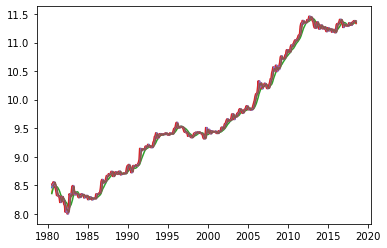

In [40]:
#Estimating trend
df_logScale = np.log(df_stationary)
plt.plot(df_logScale)

In [41]:
df_logScale

,Rate,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average
Date,,,,,,
1980-06-30,8.457677,8.368600,8.353479,8.519670,NaN,NaN
1980-07-31,8.519670,8.432129,8.399728,8.490233,8.457677,NaN
1980-08-29,8.490233,8.489514,8.440941,8.558546,8.519670,8.489154
1980-09-30,8.558546,8.523208,8.475804,8.539405,8.490233,8.505060
1980-10-31,8.539405,8.529807,8.470097,8.483367,8.558546,8.524973
...,...,...,...,...,...,...
2018-03-30,11.364294,11.357002,11.331547,11.381827,11.359279,11.353336
2018-04-30,11.381827,11.368513,11.342192,11.385285,11.364294,11.361790
2018-05-31,11.385285,11.377178,11.350036,11.372376,11.381827,11.373099


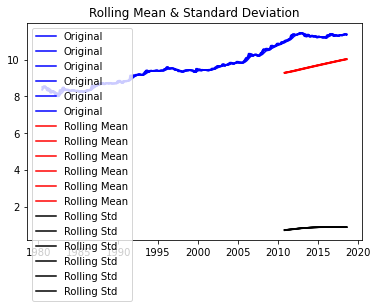

Results of Dickey Fuller Test:
Test Statistic                   0.326791
p-value                          0.978541
#Lags Used                       2.000000
Number of Observations Used    455.000000
Critical Value (1%)             -3.444804
Critical Value (5%)             -2.867913
Critical Value (10%)            -2.570165
dtype: float64


In [42]:
test_stationarity(df_logScale)

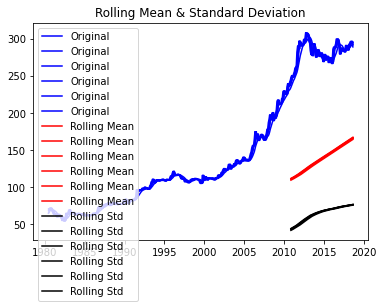

Results of Dickey Fuller Test:
Test Statistic                   1.002874
p-value                          0.994296
#Lags Used                       2.000000
Number of Observations Used    455.000000
Critical Value (1%)             -3.444804
Critical Value (5%)             -2.867913
Critical Value (10%)            -2.570165
dtype: float64


In [43]:
import stat
df_sqroot = np.sqrt(df_stationary)  # applying the sq-root tranformation
test_stationarity(df_sqroot)

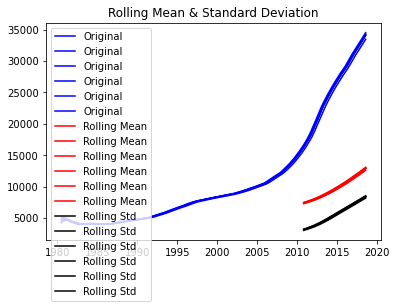

Results of Dickey Fuller Test:
Test Statistic                   0.452141
p-value                          0.983344
#Lags Used                      13.000000
Number of Observations Used    444.000000
Critical Value (1%)             -3.445164
Critical Value (5%)             -2.868072
Critical Value (10%)            -2.570249
dtype: float64


In [44]:
## exponentialDecayWeightedAverage
df_expDecayWA = df_stationary.ewm(halflife=365, min_periods=0, adjust=True).mean()
test_stationarity(df_expDecayWA)

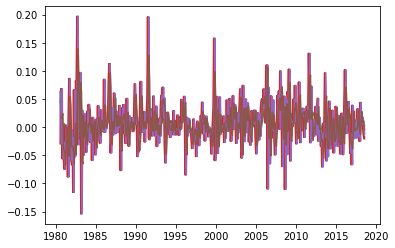

In [45]:
### df_logScale - df_logScale.shift()
df_LogDiffShifting = df_logScale - df_logScale.shift()
plt.plot(df_LogDiffShifting)

In [46]:
#The below transformation is required to make series stationary
movingAverage = df_logScale.rolling(window=365).mean()
movingSTD = df_logScale.rolling(window=365).std()

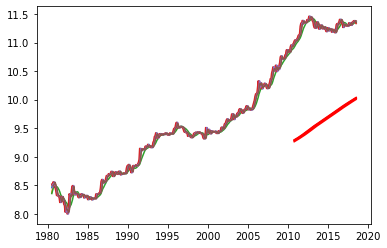

In [47]:
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')

In [48]:
datasetLogScaleMinusMovingAverage = df_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Rate,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average
Date,,,,,,
2010-12-31,1.744967,1.728362,1.686377,1.719997,1.733507,1.720234
2011-01-31,1.719997,1.732468,1.699541,1.724656,1.744967,1.739069
2011-02-28,1.724656,1.729509,1.705771,1.744134,1.719997,1.732312
2011-03-31,1.744134,1.729331,1.711087,1.758568,1.724656,1.722134
2011-04-29,1.758568,1.742255,1.721525,1.788281,1.744134,1.734274
2011-05-31,1.788281,1.763565,1.734632,1.790226,1.758568,1.751202
2011-06-30,1.790226,1.778837,1.745259,1.801268,1.788281,1.773388
2011-07-29,1.801268,1.792943,1.755794,1.924235,1.790226,1.789058
2011-08-31,1.924235,1.840443,1.778863,1.973461,1.801268,1.795586


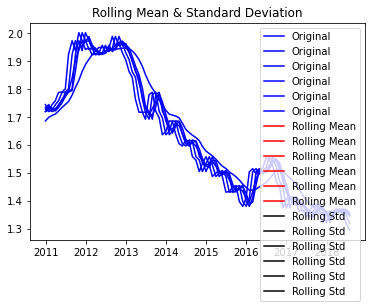

Results of Dickey Fuller Test:
Test Statistic                 -0.254435
p-value                         0.931714
#Lags Used                      0.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [49]:
test_stationarity(datasetLogScaleMinusMovingAverage)

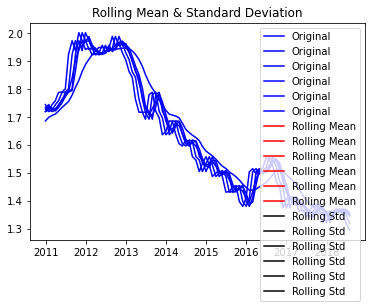

Results of Dickey Fuller Test:
Test Statistic                 -0.254435
p-value                         0.931714
#Lags Used                      0.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [50]:
test_stationarity(datasetLogScaleMinusMovingAverage.loc['19810101':])

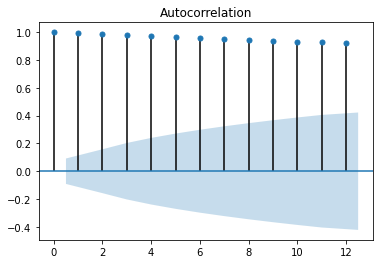

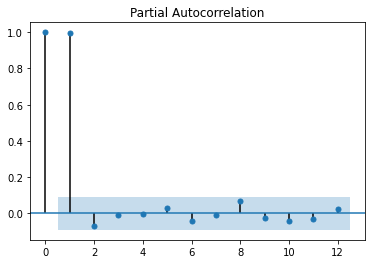

In [51]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Rate,lags=12)
tsa_plots.plot_pacf(df.Rate,lags=12)
plt.show()


In [52]:
Train = df.head(326)
Test = df[326:]

In [53]:
Train

,Date,Rate,month,year,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average
8,1980-06-30,4711.1,Jun,1980,4309.600000,4244.922222,5012.4,NaN,NaN
9,1980-07-31,5012.4,Jul,1980,4592.266667,4445.855556,4867.0,4711.1,NaN
10,1980-08-29,4867.0,Aug,1980,4863.500000,4632.911111,5211.1,5012.4,4861.75
11,1980-09-30,5211.1,Sep,1980,5030.166667,4797.277778,5112.3,4867.0,4939.70
12,1980-10-31,5112.3,Oct,1980,5063.466667,4769.977778,4833.7,5211.1,5039.05
...,...,...,...,...,...,...,...,...,...
329,2007-03-30,28785.0,Mar,2007,28698.133333,28383.700000,28611.5,29348.2,28654.70
330,2007-04-30,28611.5,Apr,2007,28914.900000,28290.833333,27238.3,28785.0,29066.60
331,2007-05-31,27238.3,May,2007,28211.600000,28046.566667,26735.6,28611.5,28698.25
332,2007-06-29,26735.6,Jun,2007,27528.466667,27952.388889,26890.0,27238.3,27924.90


In [54]:
Test

,Date,Rate,month,year,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average
334,2007-08-31,27161.7,Aug,2007,26929.100000,27872.000000,28735.7,26890.0,26812.80
335,2007-09-28,28735.7,Sep,2007,27595.800000,27940.800000,29824.5,27161.7,27025.85
336,2007-10-31,29824.5,Oct,2007,28573.966667,28147.833333,31812.3,28735.7,27948.70
337,2007-11-30,31812.3,Nov,2007,30124.166667,28421.622222,31693.9,29824.5,29280.10
338,2007-12-31,31693.9,Dec,2007,31110.233333,28744.833333,35020.6,31812.3,30818.40
...,...,...,...,...,...,...,...,...,...
461,2018-03-30,86188.7,Mar,2018,85562.500000,83412.000000,87713.1,85757.5,85249.40
462,2018-04-30,87713.1,Apr,2018,86553.100000,84304.600000,88017.0,86188.7,85973.10
463,2018-05-31,88017.0,May,2018,87306.266667,84968.544444,86888.1,87713.1,86950.90
464,2018-06-29,86888.1,Jun,2018,87539.400000,85205.477778,85122.9,88017.0,87865.05


In [55]:
# Train and test data split

Train = df_LogDiffShifting.head(round(13544*0.7))
Test = df_LogDiffShifting.tail(round(13544*0.7)-13544)

#AR Model
#making order=(2,1,0) gives RSS=2.045
plt.plot(Train)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - df_LogDiffShifting['Rate'])**2))
print('Plotting AR model')

In [56]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

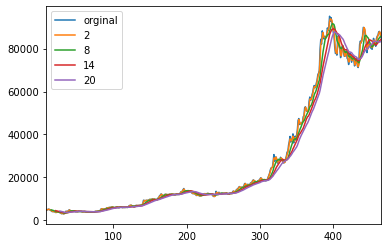

In [57]:
plt.figure
df.Rate.plot(label="orginal")
for i in range(2,24,6):
    df["Rate"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [58]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [59]:
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
#warnings.filterwarnings("ignore")
evaluate_models(df_stationary.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [60]:
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X#astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

NameError: name 'fc_series' is not defined

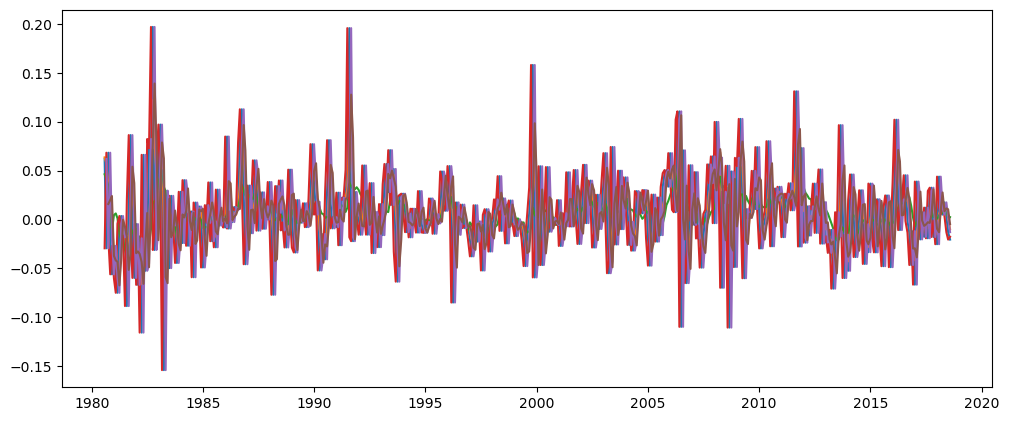

In [61]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
#Build Model based on the optimized values

In [ ]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [ ]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values


In [62]:
# fit model
model = ARIMA(X,Order(1,1,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=15)


NameError: name 'Order' is not defined

In [63]:
model_fit.plot_predict(1, 79)

NameError: name 'model_fit' is not defined

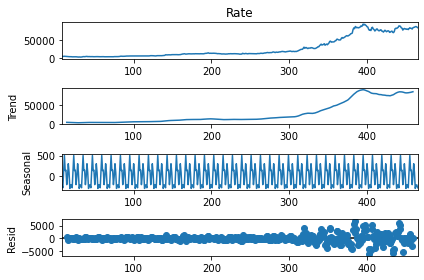

In [64]:
decompose_ts_add = seasonal_decompose(df.Rate,period=12)
decompose_ts_add.plot()
plt.show()

In [65]:
# separate out a validation dataset
split_point = len(df) - 10
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 448, Validation 10


In [66]:
df1=pd.read_excel("D:\Aysha\gold data.xlsx",header=10,names=['Date','Rate'])


In [67]:
df1

,Date,Rate
0,10/31/1979,3204.0
1,11/30/1979,3183.5
2,12/31/1979,3731.8
3,1/31/1980,5358.0
4,2/29/1980,5286.7
...,...,...
462,4/30/2018,87713.1
463,5/31/2018,88017.0
464,6/29/2018,86888.1
465,7/31/2018,85122.9


In [68]:
Train = df1.head(326)
Test = df1[326:]

In [69]:
Train

,Date,Rate
0,10/31/1979,3204.0
1,11/30/1979,3183.5
2,12/31/1979,3731.8
3,1/31/1980,5358.0
4,2/29/1980,5286.7
...,...,...
321,7/31/2006,29447.3
322,8/31/2006,29436.7
323,9/29/2006,27583.2
324,10/31/2006,26628.0


In [70]:
Test

,Date,Rate
326,12/29/2006,28116.5
327,1/31/2007,27961.2
328,2/28/2007,29348.2
329,3/30/2007,28785.0
330,4/30/2007,28611.5
...,...,...
462,4/30/2018,87713.1
463,5/31/2018,88017.0
464,6/29/2018,86888.1
465,7/31/2018,85122.9


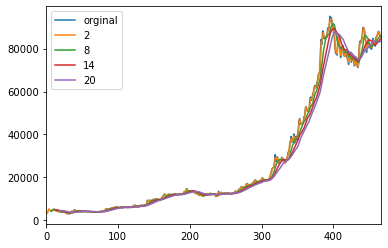

In [71]:
plt.figure
df.Rate.plot(label="orginal")
for i in range(2,24,6):
    df1["Rate"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [72]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [73]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [74]:
df1['Date'] = pd.to_datetime(df1['Date'],errors='coerce')

In [75]:
df1["month"] = df.Date.dt.strftime("%b")
df1["year"] = df.Date.dt.strftime("%Y")

In [76]:
df1

,Date,Rate,month,year
0,1979-10-31,3204.0,NaN,NaN
1,1979-11-30,3183.5,NaN,NaN
2,1979-12-31,3731.8,NaN,NaN
3,1980-01-31,5358.0,NaN,NaN
4,1980-02-29,5286.7,NaN,NaN
...,...,...,...,...
462,2018-04-30,87713.1,Apr,2018
463,2018-05-31,88017.0,May,2018
464,2018-06-29,86888.1,Jun,2018
465,2018-07-31,85122.9,Jul,2018


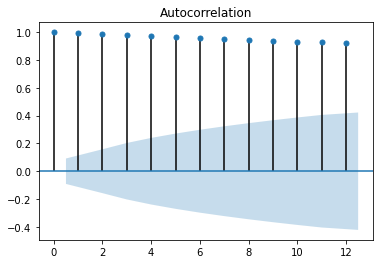

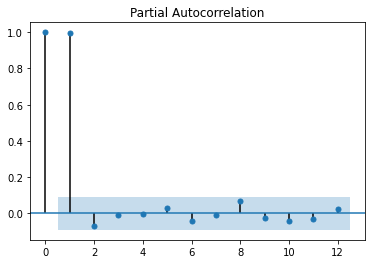

In [77]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Rate,lags=12)
tsa_plots.plot_pacf(df.Rate,lags=12)
plt.show()


In [78]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# SIMPLE EXPONENTIAL METHOD¶

In [79]:
ses_model = SimpleExpSmoothing(Train['Rate']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Rate) 

53.92645043317587

# HOLT METHOD

In [80]:
# Holt method 
hw_model = Holt(Train["Rate"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Rate)

37.63164686498377

# Holts winter exponential smoothing with additive seasonality and additive trend

In [81]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [82]:
hwe_model_add_add = ExponentialSmoothing(Train["Rate"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Rate) 

26.718280096277326

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [83]:
hwe_model_mul_add = ExponentialSmoothing(Train["Rate"],seasonal="mul",trend="add",seasonal_periods=3).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Rate)

32.6521625159658

In [84]:
# Holt method 
hw_model = Holt(df["Rate"]).fit(smoothing_level=0.8, smoothing_slope=0.2)

C:\Users\ashiq\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [120]:
#Forecasting for next 10 time periods
hw_model.forecast(30)

C:\Users\ashiq\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


458    85625.721062
459    85620.091103
460    85614.461145
461    85608.831186
462    85603.201228
463    85597.571269
464    85591.941311
465    85586.311352
466    85580.681394
467    85575.051435
468    85569.421477
469    85563.791518
470    85558.161560
471    85552.531601
472    85546.901643
473    85541.271684
474    85535.641726
475    85530.011767
476    85524.381809
477    85518.751850
478    85513.121892
479    85507.491933
480    85501.861975
481    85496.232016
482    85490.602058
483    85484.972099
484    85479.342141
485    85473.712182
486    85468.082224
487    85462.452266
dtype: float64

In [308]:
#neural_network
import xgboost as xgb
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [116]:
model = mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=12,
                           max_iter=100, random_state=5,
                           activation="relu")

In [118]:
def create_lag_feature(df1, no_of_days):
    
    for day in range(1, no_of_days+1):
        df1[f"lag_{day}"] = df1["Rate"].shift(day)
        
    return df1

In [119]:
df1_features = create_lag_feature(df_stationary, 14)
df1_features

,Rate,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,,,,,,
1980-06-30,4711.1,4309.600000,4244.922222,5012.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-07-31,5012.4,4592.266667,4445.855556,4867.0,4711.1,NaN,4711.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-08-29,4867.0,4863.500000,4632.911111,5211.1,5012.4,4861.75,5012.4,4711.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-09-30,5211.1,5030.166667,4797.277778,5112.3,4867.0,4939.70,4867.0,5012.4,4711.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-10-31,5112.3,5063.466667,4769.977778,4833.7,5211.1,5039.05,5211.1,4867.0,5012.4,4711.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-30,86188.7,85562.500000,83412.000000,87713.1,85757.5,85249.40,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7,82740.7,81224.6
2018-04-30,87713.1,86553.100000,84304.600000,88017.0,86188.7,85973.10,86188.7,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7,82740.7
2018-05-31,88017.0,87306.266667,84968.544444,86888.1,87713.1,86950.90,87713.1,86188.7,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7


In [120]:
df1_features = df1_features.dropna()
df1_features

,Rate,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,,,,,,
1981-08-31,3705.0,3768.433333,4087.288889,4039.1,3632.1,3800.15,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0,5012.4,4711.1
1981-09-30,4039.1,3792.066667,4013.277778,3998.6,3705.0,3668.55,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0,5012.4
1981-10-30,3998.6,3914.233333,3965.344444,3766.8,4039.1,3872.05,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0
1981-11-30,3766.8,3934.833333,3927.188889,3749.3,3998.6,4018.85,3998.6,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1
1981-12-31,3749.3,3838.233333,3888.988889,3507.0,3766.8,3882.70,3766.8,3998.6,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-30,86188.7,85562.500000,83412.000000,87713.1,85757.5,85249.40,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7,82740.7,81224.6
2018-04-30,87713.1,86553.100000,84304.600000,88017.0,86188.7,85973.10,86188.7,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7,82740.7
2018-05-31,88017.0,87306.266667,84968.544444,86888.1,87713.1,86950.90,87713.1,86188.7,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7


In [122]:
lag_features =  [ col for col in df1_features.columns if "lag" in col]
print(lag_features)

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14']


In [123]:
#df1_lag_features = df1_features[lag_features + ['Standard Gold (22 K)']].dropna()
#df1_lag_features.columns
df1_features.columns

Index(['Rate', 'S_3', 'S_9', 'next_day_Rate', '1_Day_Moving_Average',
       '2_Days_Moving_Average', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
       'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12',
       'lag_13', 'lag_14'],
      dtype='object')

In [124]:
train_lag = df1_features.head(round(13894*0.7))
test_lag = df1_features.tail(-round(13894*0.7)+13894)

In [125]:
X_train_df1 = train_lag.drop('Rate',axis=1)
X_test_df1= test_lag.drop("Rate",axis=1)

In [126]:
train_lag

,Rate,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,,,,,,
1981-08-31,3705.0,3768.433333,4087.288889,4039.1,3632.1,3800.15,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0,5012.4,4711.1
1981-09-30,4039.1,3792.066667,4013.277778,3998.6,3705.0,3668.55,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0,5012.4
1981-10-30,3998.6,3914.233333,3965.344444,3766.8,4039.1,3872.05,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0
1981-11-30,3766.8,3934.833333,3927.188889,3749.3,3998.6,4018.85,3998.6,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1
1981-12-31,3749.3,3838.233333,3888.988889,3507.0,3766.8,3882.70,3766.8,3998.6,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-30,86188.7,85562.500000,83412.000000,87713.1,85757.5,85249.40,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7,82740.7,81224.6
2018-04-30,87713.1,86553.100000,84304.600000,88017.0,86188.7,85973.10,86188.7,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7,82740.7
2018-05-31,88017.0,87306.266667,84968.544444,86888.1,87713.1,86950.90,87713.1,86188.7,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7


In [127]:
test_lag

,Rate,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,,,,,,
1981-08-31,3705.0,3768.433333,4087.288889,4039.1,3632.1,3800.15,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0,5012.4,4711.1
1981-09-30,4039.1,3792.066667,4013.277778,3998.6,3705.0,3668.55,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0,5012.4
1981-10-30,3998.6,3914.233333,3965.344444,3766.8,4039.1,3872.05,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0
1981-11-30,3766.8,3934.833333,3927.188889,3749.3,3998.6,4018.85,3998.6,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1
1981-12-31,3749.3,3838.233333,3888.988889,3507.0,3766.8,3882.70,3766.8,3998.6,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-30,86188.7,85562.500000,83412.000000,87713.1,85757.5,85249.40,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7,82740.7,81224.6
2018-04-30,87713.1,86553.100000,84304.600000,88017.0,86188.7,85973.10,86188.7,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7,82740.7
2018-05-31,88017.0,87306.266667,84968.544444,86888.1,87713.1,86950.90,87713.1,86188.7,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7


In [128]:
test_lag

,Rate,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,,,,,,
1981-08-31,3705.0,3768.433333,4087.288889,4039.1,3632.1,3800.15,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0,5012.4,4711.1
1981-09-30,4039.1,3792.066667,4013.277778,3998.6,3705.0,3668.55,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0,5012.4
1981-10-30,3998.6,3914.233333,3965.344444,3766.8,4039.1,3872.05,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0
1981-11-30,3766.8,3934.833333,3927.188889,3749.3,3998.6,4018.85,3998.6,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1
1981-12-31,3749.3,3838.233333,3888.988889,3507.0,3766.8,3882.70,3766.8,3998.6,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-30,86188.7,85562.500000,83412.000000,87713.1,85757.5,85249.40,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7,82740.7,81224.6
2018-04-30,87713.1,86553.100000,84304.600000,88017.0,86188.7,85973.10,86188.7,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7,82740.7
2018-05-31,88017.0,87306.266667,84968.544444,86888.1,87713.1,86950.90,87713.1,86188.7,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7


In [130]:
X_train_df1

,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,,,,,
1981-08-31,3768.433333,4087.288889,4039.1,3632.1,3800.15,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0,5012.4,4711.1
1981-09-30,3792.066667,4013.277778,3998.6,3705.0,3668.55,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0,5012.4
1981-10-30,3914.233333,3965.344444,3766.8,4039.1,3872.05,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1,4867.0
1981-11-30,3934.833333,3927.188889,3749.3,3998.6,4018.85,3998.6,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3,5211.1
1981-12-31,3838.233333,3888.988889,3507.0,3766.8,3882.70,3766.8,3998.6,4039.1,3705.0,3632.1,3968.2,4034.0,4107.8,4093.1,4110.2,4430.0,4705.2,4833.7,5112.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-30,85562.500000,83412.000000,87713.1,85757.5,85249.40,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7,82740.7,81224.6
2018-04-30,86553.100000,84304.600000,88017.0,86188.7,85973.10,86188.7,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7,82740.7
2018-05-31,87306.266667,84968.544444,86888.1,87713.1,86950.90,87713.1,86188.7,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7


In [131]:
#Fittig the model
model.fit(X_train_df1, train_lag['Rate'])

C:\Users\ashiq\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=12, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=5, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [132]:
predicted_Rate = model.predict(X_test_df1)
test_lag["Gold Predicted_Rate"] = predicted_Rate
test_lag[["Rate", "Gold Predicted_Rate"]].head()

<ipython-input-132-381f337039c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_lag["Gold Predicted_Rate"] = predicted_Rate


,Rate,Gold Predicted_Rate
Date,,
1981-08-31,3705.0,3640.735578
1981-09-30,4039.1,4045.397412
1981-10-30,3998.6,3929.162810
1981-11-30,3766.8,3867.124652
1981-12-31,3749.3,3719.832587


In [133]:
test_lag[["Rate", "Gold Predicted_Rate"]].head()

,Rate,Gold Predicted_Rate
Date,,
1981-08-31,3705.0,3640.735578
1981-09-30,4039.1,4045.397412
1981-10-30,3998.6,3929.162810
1981-11-30,3766.8,3867.124652
1981-12-31,3749.3,3719.832587


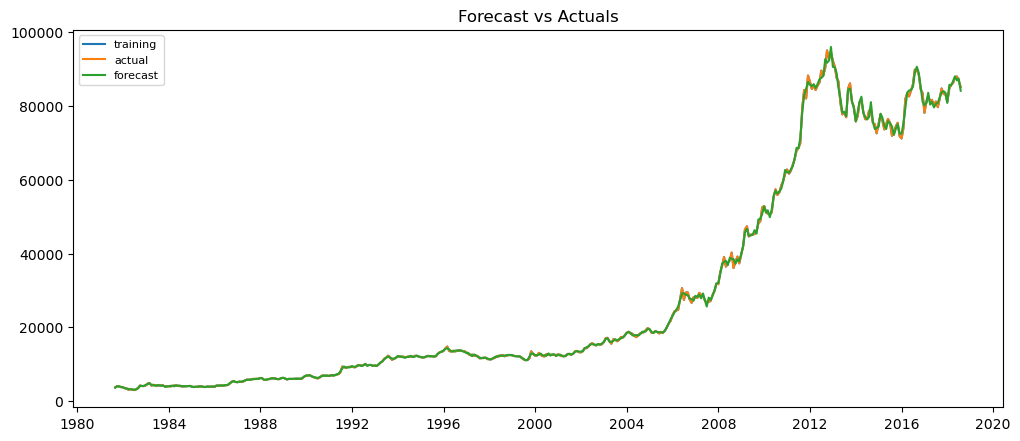

In [134]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_lag['Rate'], label='training')
plt.plot(test_lag['Rate'], label='actual')
plt.plot(test_lag['Gold Predicted_Rate'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [135]:
print(f"RMSE {mean_squared_error(test_lag['Rate'], test_lag['Gold Predicted_Rate'], squared= False)}")

RMSE 610.0898445253525


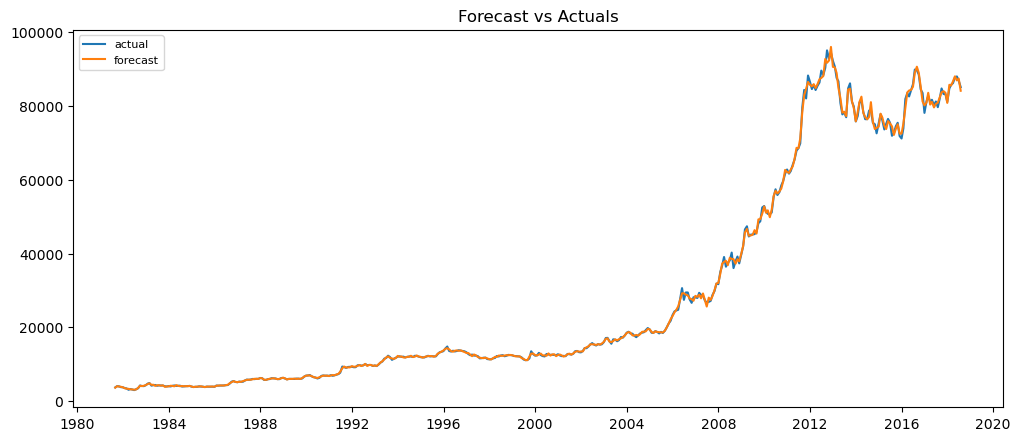

In [136]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test_lag['Rate'], label='actual')
plt.plot(test_lag['Gold Predicted_Rate'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [137]:
import datetime

def workdays(d, end, excluded=(6, 7)):
    days = []
    while d.date() <= end.date():
        if d.isoweekday() not in excluded:
            days.append(d)
        d += datetime.timedelta(days=1)
    return days

In [138]:
#workdays(datetime.datetime(2021, 9, 1),
 #              datetime.datetime(2021, 9, 30))

In [139]:
days =[]
for i in range(10):
    
    excluded=(6, 7)
    a=datetime.date(2021,9,1)+datetime.timedelta(days=i)
    if a.isoweekday() not in excluded:
        days.append(a.isoformat())  

In [140]:
df1_features_days =df1_features.copy()

In [142]:
pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
d=pd.DataFrame({'Date':days})
 
d.set_index('Date',inplace=True)
df1_features_days=df1_features_days.append(d)#.reindex(days)
df1_features_days.iloc[-9]['Rate']

C:\Users\ashiq\anaconda3\lib\site-packages\pandas\core\frame.py:7134: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(


85122.9

In [144]:
df1_test =df_stationary.iloc[-50:]
d1=df_test.index[-1]+datetime.timedelta(days=1)

day =[]
for i in range(5):
    
    excluded=(6, 7)
    #a=datetime.date(2021,9,1)+datetime.timedelta(days=i)
    a= df_test.index[-1]+datetime.timedelta(days=i)
    if a.isoweekday() not in excluded:
        day.append(a)

In [145]:
day,d1

([Timestamp('2018-07-31 00:00:00'),
  Timestamp('2018-08-01 00:00:00'),
  Timestamp('2018-08-02 00:00:00'),
  Timestamp('2018-08-03 00:00:00')],
 Timestamp('2018-08-01 00:00:00'))

In [146]:
dx=pd.DataFrame({'Date':day})
dx.set_index('Date',inplace=True)
dx

""
Date
2018-07-31
2018-08-01
2018-08-02
2018-08-03


In [147]:
df_test=df_test.append(dx)
def create_lag_feature(df, no_of_days):
    
    for day in range(1, no_of_days+1):
        df_test[f"lag_{day}"] = df_test["Rate"].shift(day)
        
    return df_test
create_lag_feature(df_test.iloc[-4,-3],14)

,1_Day_Moving_Average,2_Days_Moving_Average,Rate,S_3,S_9,lag_1,lag_10,lag_11,lag_12,lag_13,lag_14,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,next_day_Rate
Date,,,,,,,,,,,,,,,,,,,,
2014-06-30,76425.3,77401.10,76433.5,77078.566667,78642.388889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78752.5
2014-07-31,76433.5,76429.40,78752.5,77203.766667,78377.900000,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78909.9
2014-08-29,78752.5,77593.00,78909.9,78031.966667,78268.888889,78752.5,NaN,NaN,NaN,NaN,NaN,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75404.8
2014-09-30,78909.9,78831.20,75404.8,77689.066667,78224.333333,78909.9,NaN,NaN,NaN,NaN,NaN,78752.5,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,75051.9
2014-10-31,75404.8,77157.35,75051.9,76455.533333,77972.788889,75404.8,NaN,NaN,NaN,NaN,NaN,78909.9,78752.5,76433.5,NaN,NaN,NaN,NaN,NaN,72587.2
2014-11-28,75051.9,75228.35,72587.2,74347.966667,77042.666667,75051.9,NaN,NaN,NaN,NaN,NaN,75404.8,78909.9,78752.5,76433.5,NaN,NaN,NaN,NaN,75304.6
2014-12-31,72587.2,73819.55,75304.6,74314.566667,76360.733333,72587.2,NaN,NaN,NaN,NaN,NaN,75051.9,75404.8,78909.9,78752.5,76433.5,NaN,NaN,NaN,77801.2
2015-01-30,75304.6,73945.90,77801.2,75231.000000,76296.766667,75304.6,NaN,NaN,NaN,NaN,NaN,72587.2,75051.9,75404.8,78909.9,78752.5,76433.5,NaN,NaN,76152.6
2015-02-27,77801.2,76552.90,76152.6,76419.466667,76266.466667,77801.2,NaN,NaN,NaN,NaN,NaN,75304.6,72587.2,75051.9,75404.8,78909.9,78752.5,76433.5,NaN,73637.5


In [154]:
p=model.predict(x)
p[0]

88037.76753180423

In [155]:
x['Rate']=p

In [156]:
x

,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,Rate
Date,,,,,,,,,,,,,,,,,,,,
2018-04-30,86553.1,84304.6,88017.0,86188.7,85973.1,86188.7,85757.5,84741.3,81106.3,83181.1,83256.2,84755.7,82041.5,79679.7,81223.0,80241.9,81675.7,81075.7,82740.7,88037.767532


In [157]:
df1_test.loc['20210722']['Rate']=p[0]
df1_test

,1_Day_Moving_Average,2_Days_Moving_Average,Rate,S_3,S_9,lag_1,lag_10,lag_11,lag_12,lag_13,lag_14,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,next_day_Rate
Date,,,,,,,,,,,,,,,,,,,,
2014-06-30,76425.3,77401.10,76433.5,77078.566667,78642.388889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78752.5
2014-07-31,76433.5,76429.40,78752.5,77203.766667,78377.900000,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78909.9
2014-08-29,78752.5,77593.00,78909.9,78031.966667,78268.888889,78752.5,NaN,NaN,NaN,NaN,NaN,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75404.8
2014-09-30,78909.9,78831.20,75404.8,77689.066667,78224.333333,78909.9,NaN,NaN,NaN,NaN,NaN,78752.5,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,75051.9
2014-10-31,75404.8,77157.35,75051.9,76455.533333,77972.788889,75404.8,NaN,NaN,NaN,NaN,NaN,78909.9,78752.5,76433.5,NaN,NaN,NaN,NaN,NaN,72587.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85122.9,86888.1,88017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85122.9,86888.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85122.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
df1_test.loc['20210722']['Price']=p[0]
df1_test

,1_Day_Moving_Average,2_Days_Moving_Average,Rate,S_3,S_9,lag_1,lag_10,lag_11,lag_12,lag_13,lag_14,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,next_day_Rate
Date,,,,,,,,,,,,,,,,,,,,
2014-06-30,76425.3,77401.10,76433.5,77078.566667,78642.388889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78752.5
2014-07-31,76433.5,76429.40,78752.5,77203.766667,78377.900000,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78909.9
2014-08-29,78752.5,77593.00,78909.9,78031.966667,78268.888889,78752.5,NaN,NaN,NaN,NaN,NaN,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75404.8
2014-09-30,78909.9,78831.20,75404.8,77689.066667,78224.333333,78909.9,NaN,NaN,NaN,NaN,NaN,78752.5,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,75051.9
2014-10-31,75404.8,77157.35,75051.9,76455.533333,77972.788889,75404.8,NaN,NaN,NaN,NaN,NaN,78909.9,78752.5,76433.5,NaN,NaN,NaN,NaN,NaN,72587.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
x=df1_test.iloc[-4:-3,]
x=x.drop('Rate',axis=1)
#x=pd.DataFrame(x)
x

,1_Day_Moving_Average,2_Days_Moving_Average,S_3,S_9,lag_1,lag_10,lag_11,lag_12,lag_13,lag_14,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,next_day_Rate
Date,,,,,,,,,,,,,,,,,,,
2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85122.9,86888.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
df1_test=df1_test.append(dx)
def create_lag_feature(df1, no_of_days):
    
    for day in range(1, no_of_days+1):
        df1_test[f"lag_{day}"] = df1_test["Rate"].shift(day)
        
    return df1_test
create_lag_feature(df1_test.iloc[-4,-3],14)

C:\Users\ashiq\anaconda3\lib\site-packages\pandas\core\frame.py:7134: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(


,1_Day_Moving_Average,2_Days_Moving_Average,Rate,S_3,S_9,lag_1,lag_10,lag_11,lag_12,lag_13,lag_14,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,next_day_Rate
Date,,,,,,,,,,,,,,,,,,,,
2014-06-30,76425.3,77401.10,76433.5,77078.566667,78642.388889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78752.5
2014-07-31,76433.5,76429.40,78752.5,77203.766667,78377.900000,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78909.9
2014-08-29,78752.5,77593.00,78909.9,78031.966667,78268.888889,78752.5,NaN,NaN,NaN,NaN,NaN,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75404.8
2014-09-30,78909.9,78831.20,75404.8,77689.066667,78224.333333,78909.9,NaN,NaN,NaN,NaN,NaN,78752.5,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,75051.9
2014-10-31,75404.8,77157.35,75051.9,76455.533333,77972.788889,75404.8,NaN,NaN,NaN,NaN,NaN,78909.9,78752.5,76433.5,NaN,NaN,NaN,NaN,NaN,72587.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
df1_test.loc['20210722']['Rate']=p[0]
df1_test

,1_Day_Moving_Average,2_Days_Moving_Average,Rate,S_3,S_9,lag_1,lag_10,lag_11,lag_12,lag_13,lag_14,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,next_day_Rate
Date,,,,,,,,,,,,,,,,,,,,
2014-06-30,76425.3,77401.10,76433.5,77078.566667,78642.388889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78752.5
2014-07-31,76433.5,76429.40,78752.5,77203.766667,78377.900000,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78909.9
2014-08-29,78752.5,77593.00,78909.9,78031.966667,78268.888889,78752.5,NaN,NaN,NaN,NaN,NaN,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75404.8
2014-09-30,78909.9,78831.20,75404.8,77689.066667,78224.333333,78909.9,NaN,NaN,NaN,NaN,NaN,78752.5,76433.5,NaN,NaN,NaN,NaN,NaN,NaN,75051.9
2014-10-31,75404.8,77157.35,75051.9,76455.533333,77972.788889,75404.8,NaN,NaN,NaN,NaN,NaN,78909.9,78752.5,76433.5,NaN,NaN,NaN,NaN,NaN,72587.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
x=df1_test.iloc[-4:-3,]
x=x.drop('Rate',axis=1)
#x=pd.DataFrame(x)
x

,1_Day_Moving_Average,2_Days_Moving_Average,S_3,S_9,lag_1,lag_10,lag_11,lag_12,lag_13,lag_14,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,next_day_Rate
Date,,,,,,,,,,,,,,,,,,,
2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
p=model.predict(x)
p[0]
x['Rate']=p
x

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [175]:
#df = df.set_index(['Date'])
df1_stationary=df.copy()
df1_stationary=df_stationary.drop(['month','year'],axis=1)
df1_stationary = df_stationary.set_index(['Date'])

KeyError: "['month' 'year'] not found in axis"

In [176]:
df1_stationary

,Date,Rate,month,year,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average
8,1980-06-30,4711.1,Jun,1980,4309.600000,4244.922222,5012.4,NaN,NaN
9,1980-07-31,5012.4,Jul,1980,4592.266667,4445.855556,4867.0,4711.1,NaN
10,1980-08-29,4867.0,Aug,1980,4863.500000,4632.911111,5211.1,5012.4,4861.75
11,1980-09-30,5211.1,Sep,1980,5030.166667,4797.277778,5112.3,4867.0,4939.70
12,1980-10-31,5112.3,Oct,1980,5063.466667,4769.977778,4833.7,5211.1,5039.05
...,...,...,...,...,...,...,...,...,...
461,2018-03-30,86188.7,Mar,2018,85562.500000,83412.000000,87713.1,85757.5,85249.40
462,2018-04-30,87713.1,Apr,2018,86553.100000,84304.600000,88017.0,86188.7,85973.10
463,2018-05-31,88017.0,May,2018,87306.266667,84968.544444,86888.1,87713.1,86950.90
464,2018-06-29,86888.1,Jun,2018,87539.400000,85205.477778,85122.9,88017.0,87865.05


In [177]:
'''def create_lag_feature(df1, no_of_days):
    
    for day in range(1, no_of_days+1):
        df1[f"lag_{day}"] = df["Rate"].shift(day)
        
    return df'''
#df1_features_days.index[-8]
#for day in range(1, 15):
#    df1_features_days.iloc[13894][f"lag_{day}"] = df1_features_days.iloc[13894]["Price"]

df1_forcast =df1_stationary.iloc[-50:]
def Forcast(df,Days):
    #days=[]
    for i in range(1, Days+1):
        days=[]
        excluded=(6, 7)
         #df1.index[-1]+datetime.timedelta(days=i)
        a=df1.index[-1]+datetime.timedelta(days=i)
        if a.isoweekday() not in excluded:
            #days.append(a)
            dx=pd.DataFrame({'Date':a})
            dx.set_index('Date',inplace=True)
            df1=df1.append(dx)
            for day in range(1,15):
                df1[f"lag_{day}"] = df1["Rate"].shift(day)
            #if df.Price.isnull().any():
                #place=df[df.Price.isnull()].index
                xi=df1.iloc[-1:,]
                xi=xi.drop("Rate",axis=1)
                predict=model.predict(xi)
                df1.iloc[-1:,]['Rate']=predict[0]
        

In [178]:
df1_forcast =df1_stationary.iloc[-50:]
df1_forcast.tail()


,Date,Rate,month,year,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average
461,2018-03-30,86188.7,Mar,2018,85562.500000,83412.000000,87713.1,85757.5,85249.40
462,2018-04-30,87713.1,Apr,2018,86553.100000,84304.600000,88017.0,86188.7,85973.10
463,2018-05-31,88017.0,May,2018,87306.266667,84968.544444,86888.1,87713.1,86950.90
464,2018-06-29,86888.1,Jun,2018,87539.400000,85205.477778,85122.9,88017.0,87865.05
465,2018-07-31,85122.9,Jul,2018,86676.000000,85412.888889,83631.9,86888.1,87452.55


In [180]:
df1_forcast.tail(15)


,Date,Rate,month,year,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average
451,2017-05-31,80241.9,May,2017,80997.766667,82405.422222,81223.0,81675.7,81375.70
452,2017-06-30,81223.0,Jun,2017,81046.866667,81593.166667,79679.7,80241.9,80958.80
453,2017-07-31,79679.7,Jul,2017,80381.533333,81056.466667,82041.5,81223.0,80732.45
454,2017-08-31,82041.5,Aug,2017,80981.400000,80892.833333,84755.7,79679.7,80451.35
455,2017-09-29,84755.7,Sep,2017,82158.966667,81628.722222,83256.2,82041.5,80860.60
456,2017-10-31,83256.2,Oct,2017,83351.133333,81854.455556,83181.1,84755.7,83398.60
457,2017-11-30,83181.1,Nov,2017,83731.000000,81903.388889,81106.3,83256.2,84005.95
458,2017-12-29,81106.3,Dec,2017,82514.533333,81906.788889,84741.3,83181.1,83218.65
459,2018-01-31,84741.3,Jan,2018,83009.566667,82247.411111,85757.5,81106.3,82143.70
460,2018-02-28,85757.5,Feb,2018,83868.366667,82860.255556,86188.7,84741.3,82923.80


In [184]:
if df1_for.Rate.isnull().any():
    print(df1_for[df1_for.Rate.isnull()].index[0])


NameError: name 'df1_for' is not defined

In [186]:
df1_forcast.tail(15)

#dfor=df_for[df_for.Price.isnull()].index

,Date,Rate,month,year,S_3,S_9,next_day_Rate,1_Day_Moving_Average,2_Days_Moving_Average
451,2017-05-31,80241.9,May,2017,80997.766667,82405.422222,81223.0,81675.7,81375.70
452,2017-06-30,81223.0,Jun,2017,81046.866667,81593.166667,79679.7,80241.9,80958.80
453,2017-07-31,79679.7,Jul,2017,80381.533333,81056.466667,82041.5,81223.0,80732.45
454,2017-08-31,82041.5,Aug,2017,80981.400000,80892.833333,84755.7,79679.7,80451.35
455,2017-09-29,84755.7,Sep,2017,82158.966667,81628.722222,83256.2,82041.5,80860.60
456,2017-10-31,83256.2,Oct,2017,83351.133333,81854.455556,83181.1,84755.7,83398.60
457,2017-11-30,83181.1,Nov,2017,83731.000000,81903.388889,81106.3,83256.2,84005.95
458,2017-12-29,81106.3,Dec,2017,82514.533333,81906.788889,84741.3,83181.1,83218.65
459,2018-01-31,84741.3,Jan,2018,83009.566667,82247.411111,85757.5,81106.3,82143.70
460,2018-02-28,85757.5,Feb,2018,83868.366667,82860.255556,86188.7,84741.3,82923.80
